<h2> Problem Set 3 </h2>

<h3> Question 1 </h3>

Introduction

Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

In [2]:
#Step 1: Import Library
import pandas as pd

# Step 2. Import the dataset from this address:
# Step 3: Assign it to a variable called users
users = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user", sep='|', index_col='user_id')
users.head()

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [3]:
# Step 4. Discover what is the mean age per occupation
mean_age_per_occupation = users.groupby('occupation').age.mean()
mean_age_per_occupation

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [4]:
# Step 5. Discover the Male ratio per occupation and sort it from the most to the least

male_ratio = users.groupby('occupation')['gender'].apply(lambda x: (x == 'M').sum() / x.count()).sort_values(ascending=False)
male_ratio

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
Name: gender, dtype: float64

In [12]:
# Function for male ratio occurrence
def male_ratio_occurrence(x):
    if x['gender'] == 'M':
        return 1
    else:
        return 0

users['male_ratio_occurrence'] = users.apply(male_ratio_occurrence, axis=1)
male_ratio = users.groupby('occupation')['male_ratio_occurrence'].sum() / users.groupby('occupation').size()
male_ratio = male_ratio.sort_values(ascending=False)

print(male_ratio)

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
dtype: float64


In [14]:
# Step 6. For each occupation, calculate the minimum and maximum ages
min_max_ages = users.groupby('occupation')['age'].agg(['min', 'max'])
print(f"\nMinimum and maximum ages per occupation:\n \n {min_max_ages}")


Minimum and maximum ages per occupation:
 
                min  max
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70
entertainment   15   50
executive       22   69
healthcare      22   62
homemaker       20   50
lawyer          21   53
librarian       23   69
marketing       24   55
none            11   55
other           13   64
programmer      20   63
retired         51   73
salesman        18   66
scientist       23   55
student          7   42
technician      21   55
writer          18   60


In [19]:
#Step 7. For each combination of occupation and sex, calculate the mean age

mean_age_combination = users.groupby(["occupation", "gender"]).age.mean()
print(f"\nMean age for each combination of occupation and gender are:\n \n {mean_age_combination}")


Mean age for each combination of occupation and gender are:
 
 occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
    

In [20]:
#Step 8. For each occupation present the percentage of women and men
users.groupby(['occupation', 'gender']).size() / users.groupby('occupation').size()

occupation     gender
administrator  F         0.455696
               M         0.544304
artist         F         0.464286
               M         0.535714
doctor         M         1.000000
educator       F         0.273684
               M         0.726316
engineer       F         0.029851
               M         0.970149
entertainment  F         0.111111
               M         0.888889
executive      F         0.093750
               M         0.906250
healthcare     F         0.687500
               M         0.312500
homemaker      F         0.857143
               M         0.142857
lawyer         F         0.166667
               M         0.833333
librarian      F         0.568627
               M         0.431373
marketing      F         0.384615
               M         0.615385
none           F         0.444444
               M         0.555556
other          F         0.342857
               M         0.657143
programmer     F         0.090909
               M         0

<h3> Question 2 </h3>

In [21]:
# Step 1. Import the necessary libraries
import pandas as pd

# Step 2. Import the dataset from this address
# Step 3. Assign it to a variable called euro12

euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [22]:
# Step 4. Select only the Goal column
euro12.Goals

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [23]:
# Step 5. How many team participated in the Euro2012?

euro12.Team.count()

16

In [24]:
# Step 6. What is the number of columns in the dataset?

euro12.shape[1]

35

In [25]:
# Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [26]:
# Step 8. Sort the teams by Red Cards, then to Yellow Cards

discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending = False)

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


In [27]:
# Step 9. Calculate the mean Yellow Cards given per Team
discipline['Yellow Cards'].mean()

7.4375

In [28]:
# Step 10. Filter teams that scored more than 6 goals
euro12[euro12.Goals > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [29]:
# Step 11: Select the teams that start with G

euro12[euro12.Team.str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [30]:
# Step 12. Select the first 7 columns

euro12.iloc[:, :7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [31]:
# Step 13. Select all columns except the last 3

euro12.iloc[:, :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [32]:
# Step 14: Present only the Shooting Accuracy from England, Italy, and Russia

euro12.loc[euro12.Team.isin(['England', 'Italy', 'Russia']), ['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


<h3> Question 3 </h3>

In [33]:
# Step 1. Import the libraries

import pandas as pd
import numpy as np

# Step 2. 

# Create 3 differents Series, each of length 100, as follows:
# The first a random number from 1 to 4
# The second a random number from 1 to 3
# The third a random number from 10,000 to 30,000
    
Series1 = pd.Series(np.random.randint(1, high=5, size=100, dtype='l'))
Series2 = pd.Series(np.random.randint(1, high=4, size=100, dtype='l'))
Series3 = pd.Series(np.random.randint(10000, high=30001, size=100, dtype='l'))

In [35]:
# Step 3. Let's create a DataFrame by joinning the Series by column

housing_df = pd.concat([Series1, Series2, Series3], axis=1)
housing_df.head()


,0,1,2
0,1,1,25601
1,4,3,21292
2,1,3,21059
3,1,1,22895
4,1,2,27353


In [36]:
# Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

housing_df.rename(columns = {0: 'bedrs', 1: 'bathrs', 2: 'price_sqr_meter'}, inplace=True)
housing_df.head()

,bedrs,bathrs,price_sqr_meter
0,1,1,25601
1,4,3,21292
2,1,3,21059
3,1,1,22895
4,1,2,27353


In [37]:
# Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

bigcolumn = pd.concat([Series1, Series2, Series3], axis=0)

# transforming it to a DataFrame
bigcolumn = bigcolumn.to_frame()

bigcolumn

,0
0,1
1,4
2,1
3,1
4,1
...,...
95,23672
96,13522
97,25599
98,28217


In [38]:
# Step 6. Ops, it seems it is going only until index 99. Is it true?

# Checking length of the string
len(bigcolumn)

300

In [39]:
# Step 7. Reindex the DataFrame so it goes from 0 to 299

bigcolumn.reset_index(drop=True, inplace=True)
bigcolumn

,0
0,1
1,4
2,1
3,1
4,1
...,...
295,23672
296,13522
297,25599
298,28217


<h3> Question 4 </h3>

In [45]:
# Step 1: Import the necessary libraries
import pandas as pd
import numpy as np

In [ ]:
# Step 2. Import the dataset from this address
file_path = r"C:\Users\Meru\Downloads\wind.txt"
data = pd.read_table(file_path, sep='\s+', parse_dates=[[0, 1, 2]])

In [53]:
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [54]:
# Step 3: Assign datetime index
data.rename(columns={'Yr_Mo_Dy': 'Date'}, inplace=True)
data.head()

,Date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [55]:
# Step 4
data['Date'] = data['Date'].apply(lambda date: date.replace(year=date.year - 100) if date.year > 1989 else date)

In [56]:
data.head()

,Date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [57]:
# Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

data.set_index('Date', inplace=True)
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [58]:
# Step 6
data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [59]:
# Step 7.
data.notnull().sum().sum()

78857

In [60]:
# Step 8
data.mean().mean()

10.227982360836938

In [61]:
# Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days

loc_stats = data.describe().transpose()[['min', 'max', 'mean', 'std']]
loc_stats

,min,max,mean,std
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.00,26.16,7.092254,3.968683
DUB,0.00,30.37,9.797343,4.977555
CLA,0.00,31.08,8.495053,4.499449
MUL,0.00,25.88,8.493590,4.166872
CLO,0.04,28.21,8.707332,4.503954


In [62]:
# Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.

day_stats = data.resample('D').agg(['min', 'max', 'mean', 'std'])
day_stats

RPT                      VAL                      ROS         \
              min    max   mean std    min    max   mean std    min    max   
Date                                                                         
1961-01-01  15.04  15.04  15.04 NaN  14.96  14.96  14.96 NaN  13.17  13.17   
1961-01-02  14.71  14.71  14.71 NaN    NaN    NaN    NaN NaN  10.83  10.83   
1961-01-03  18.50  18.50  18.50 NaN  16.88  16.88  16.88 NaN  12.33  12.33   
1961-01-04  10.58  10.58  10.58 NaN   6.63   6.63   6.63 NaN  11.75  11.75   
1961-01-05  13.33  13.33  13.33 NaN  13.25  13.25  13.25 NaN  11.42  11.42   
...           ...    ...    ...  ..    ...    ...    ...  ..    ...    ...   
1978-12-27  17.58  17.58  17.58 NaN  16.96  16.96  16.96 NaN  17.62  17.62   
1978-12-28  13.21  13.21  13.21 NaN   5.46   5.46   5.46 NaN  13.46  13.46   
1978-12-29  14.00  14.00  14.00 NaN  10.29  10.29  10.29 NaN  14.42  14.42   
1978-12-30  18.50  18.50  18.50 NaN  14.04  14.04  14.04 NaN  21.29  21.29   
1978-12-31  20.33  20.33  20.33 NaN  17.41  17.41  17.41 NaN  27.29  27.29   

            ...    CLO        BEL                      MAL                    
            ...   mean std    min    max   mean std    min    max   mean std  
Date        ...                                                               
1961-01-01  ...  12.58 NaN  18.50  18.50  18.50 NaN  15.04  15.04  15.04 NaN  
1961-01-02  ...   9.67 NaN  17.54  17.54  17.54 NaN  13.83  13.83  13.83 NaN  
1961-01-03  ...   7.67 NaN  12.75  12.75  12.75 NaN  12.71  12.71  12.71 NaN  
1961-01-04  ...   5.88 NaN   5.46   5.46   5.46 NaN  10.88  10.88  10.88 NaN  
1961-01-05  ...  10.34 NaN  12.92  12.92  12.92 NaN  11.83  11.83  11.83 NaN  
...         ...    ...  ..    ...    ...    ...  ..    ...    ...    ...  ..  
1978-12-27  ...  14.00 NaN  17.21  17.21  17.21 NaN  40.08  40.08  40.08 NaN  
1978-12-28  ...  18.05 NaN  21.79  21.79  21.79 NaN  41.46  41.46  41.46 NaN  
1978-12-29  ...  16.42 NaN  18.88  18.88  18.88 NaN  29.58  29.58  29.58 NaN  
1978-12-30  ...  12.12 NaN  14.67  14.67  14.67 NaN  28.79  28.79  28.79 NaN  
1978-12-31  ...  11.38 NaN  12.08  12.08  12.08 NaN  22.08  22.08  22.08 NaN  

[6574 rows x 48 columns]

In [63]:
# Step 11. Find the average windspeed in January for each location.
#Treat January 1961 and January 1962 both as January.

data.loc[data.index.month == 1].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [64]:
# Step 12. Downsample the record to a yearly frequency for each location.
data.groupby(data.index.year).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


In [65]:
# Step 13. Downsample the record to a monthly frequency for each location.
data.resample('M').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-31,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02-28,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03-31,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04-30,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05-31,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09-30,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10-31,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


In [66]:
# Step 14. Downsample the record to a weekly frequency for each location.

# resampling data to 'W' week and use the functions
Week = data.resample('W').agg(['min','max','mean','std'])

# slicing it for the first 52 weeks and locations
Week.loc[Week.index[1:53], "RPT":"MAL"] .head(10)

RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
Date                                                                     
1961-01-08  10.58  18.50  13.541429  2.631321   6.63  16.88  11.486667   
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  19.83  13.204286  5.337402   3.42  14.37   9.862857   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  23.91  16.141429   
1961-02-05  10.58  24.21  16.827143  5.251408   9.46  24.21  15.460000   
1961-02-12  16.00  24.54  19.684286  3.587677  11.54  21.42  16.417143   
1961-02-19   6.04  22.50  15.130000  5.064609  11.63  20.17  15.091429   
1961-02-26   7.79  25.80  15.221429  7.020716   7.08  21.50  13.625714   
1961-03-05  10.96  13.33  12.101429  0.997721   8.83  17.00  12.951429   
1961-03-12   4.88  14.79   9.376667  3.732263   8.08  16.96  11.578571   

                        ROS         ...        CLO              BEL         \
                 std    min    max  ...       mean       std    min    max   
Date                                ...                                      
1961-01-08  3.949525   7.62  12.33  ...   8.497143  1.704941   5.46  17.54   
1961-01-15  3.148945   7.08  19.50  ...   7.571429  4.084293   5.25  20.71   
1961-01-22  3.837785   7.29  20.79  ...   8.124286  4.783952   6.50  15.92   
1961-01-29  5.170224  12.67  25.84  ...  15.640000  3.713368  14.04  27.71   
1961-02-05  5.187395   9.04  19.70  ...   9.460000  2.839501   9.17  19.33   
1961-02-12  3.608373  13.67  21.34  ...  14.440000  1.746749  15.21  26.38   
1961-02-19  3.575012   6.13  19.41  ...  13.542857  2.531361  14.09  29.63   
1961-02-26  5.147348   6.08  22.42  ...  12.730000  4.920064   9.59  23.21   
1961-03-05  2.851955   8.17  13.67  ...  12.370000  1.593685  11.58  23.45   
1961-03-12  3.230167   7.54  16.38  ...  10.458571  3.655113  10.21  22.71   

                                   MAL                              
                 mean       std    min    max       mean       std  
Date                                                                
1961-01-08  12.481429  4.349139  10.88  16.46  13.238571  1.773062  
1961-01-15  11.125714  5.552215   5.17  16.92  11.024286  4.692355  
1961-01-22   9.821429  3.626584   6.79  17.96  11.434286  4.237239  
1961-01-29  20.930000  5.210726  17.50  27.63  22.530000  3.874721  
1961-02-05  14.012857  4.210858   7.17  19.25  11.935714  4.336104  
1961-02-12  21.832857  4.063753  17.04  21.84  19.155714  1.828705  
1961-02-19  21.167143  5.910938  10.96  22.58  16.584286  4.685377  
1961-02-26  16.304286  5.091162   6.67  23.87  14.322857  6.182283  
1961-03-05  17.842857  4.332331   8.83  17.54  13.951667  3.021387  
1961-03-12  16.701429  4.358759   5.54  22.54  14.420000  5.769890  

[10 rows x 48 columns]

<h3> Question 5 </h3>

In [67]:
# Step 1. Import libraries

import pandas as pd
# Step 2. Import the dataset from the address into tsv format.
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

# Step 3. Assign the imported dataset to a variable called chipo.
chipo = pd.read_csv(url, sep='\t')

# Step 4. See the first 10 entries
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [68]:
# Step 5. What is the number of observations in the dataset?
len(chipo)

4622

In [69]:
# Step 6. What is the number of columns in the dataset?

chipo.shape[1]

5

In [70]:
# Step 7. Print the name of all the columns.

chipo.columns.tolist()

['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']

In [71]:
# Step 8. How is the dataset indexed?

chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [72]:
# Step 9. Which was the most-ordered item?

chipo.groupby('item_name').quantity.sum().idxmax()

'Chicken Bowl'

In [73]:
# Step 10. For the most-ordered item, how many items were ordered?

chipo.groupby('item_name').quantity.sum().max()

761

In [74]:
# Step 11. What was the most ordered item in the choice_description column?

chipo.groupby('choice_description').quantity.sum().idxmax()

'[Diet Coke]'

In [75]:
# Step 12. How many items were ordered in total?

chipo.quantity.sum()

4972

In [ ]:
# Step 13
# • Turn the item price into a float
chipo.item_price= chipo['item_price'].apply(lambda x: float(x[1:]))

In [79]:
# • Check the item price type
chipo['item_price'].dtype

dtype('float64')

In [ ]:
# • Create a lambda function and change the type of item price
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x))

In [80]:
# • Check the item price type
chipo['item_price'].dtype

dtype('float64')

In [81]:
# Step 14. How much was the revenue for the period in the dataset?
total_revenue =(chipo['quantity'] * chipo['item_price']).sum()
total_revenue

39237.02

In [82]:
# Step 15. How many orders were made in the period?
total_orders =chipo['order_id'].nunique()
total_orders

1834

In [83]:
# Step 16. What is the average revenue amount per order?

total_revenue/total_orders

21.39423118865867

In [84]:
# Step 17. How many different items are sold?

chipo['item_name'].nunique()

50

<h3> Question 6 </h3>

Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend.

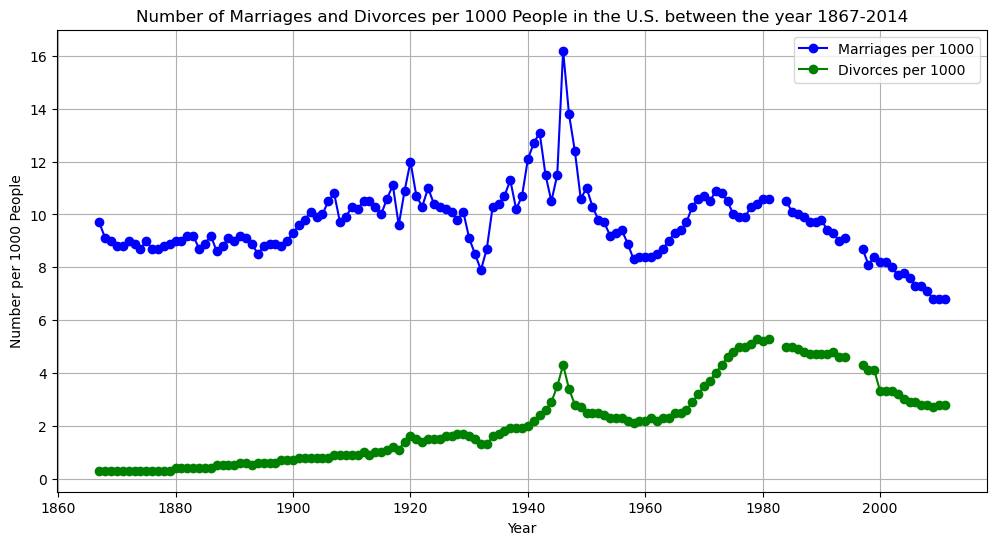

In [85]:
#importing libraries

import pandas as pd
import matplotlib.pyplot as plt

# Specifying the file path for the dataset on U.S. marriages and divorces
file_path = r"C:\Users\Meru\Downloads\us-marriages-divorces-1867-2014.csv"

# Reading the dataset into a pandas DataFrame
marriage_data = pd.read_csv(file_path)

# Creating a figure with a specified size
plt.figure(figsize=(12, 6))


# Plotting the number of marriages and divorces per capita over the years
plt.plot(marriage_data['Year'], marriage_data['Marriages_per_1000'], label='Marriages per 1000', marker='o', color='blue')
plt.plot(marriage_data['Year'], marriage_data['Divorces_per_1000'], label='Divorces per 1000', marker='o', color='green')

# Adding labels to the x and y axes
plt.xlabel('Year')
plt.ylabel('Number per 1000 People')

# Adding a title to the plot
plt.title('Number of Marriages and Divorces per 1000 People in the U.S. between the year 1867-2014')

# Adding a legend to the plot
plt.legend()

# Displaying a grid on the plot
plt.grid(True)

# Displaying the plot
plt.show()

<h3> Question 7 </h3>

Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.


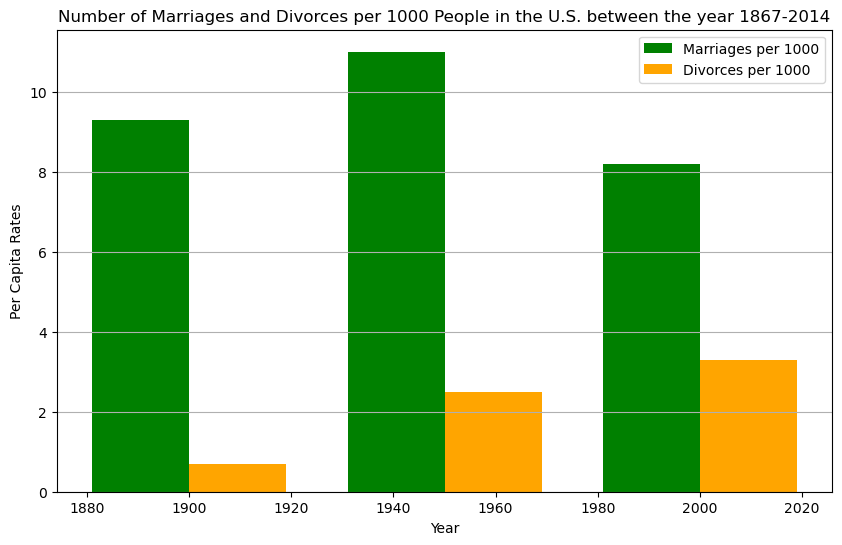

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

# Specifying the file path for the dataset on U.S. marriages and divorces
file_path = r"C:\Users\Meru\Downloads\us-marriages-divorces-1867-2014.csv"

# Reading the dataset into a pandas DataFrame
data = pd.read_csv(file_path)

# Selecting data for specific years (1900, 1950, 2000)
selected_years = data[data['Year'].isin([1900, 1950, 2000])]

# Creating a figure with a specified size
plt.figure(figsize=(10, 6))

# Setting the width of the bars
bar_width = 19

# Calculating the positions for marriages and divorces bars
bar_positions_marriages = selected_years['Year'] - bar_width / 2
bar_positions_divorces = selected_years['Year'] + bar_width / 2

# Plotting grouped bar charts for marriages and divorces
plt.bar(bar_positions_marriages, selected_years['Marriages_per_1000'], bar_width, label='Marriages per 1000', color='green')
plt.bar(bar_positions_divorces, selected_years['Divorces_per_1000'], bar_width, label='Divorces per 1000', color='orange')

# Adding labels to the x and y axes
plt.xlabel('Year')
plt.ylabel('Per Capita Rates')

# Adding a title to the plot
plt.title('Number of Marriages and Divorces per 1000 People in the U.S. between the year 1867-2014')

# Adding a legend to the plot
plt.legend()

# Displaying a grid on the y-axis
plt.grid(axis='y')

# Displaying the plot
plt.show()

<h3> Question 8 </h3>

Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name.

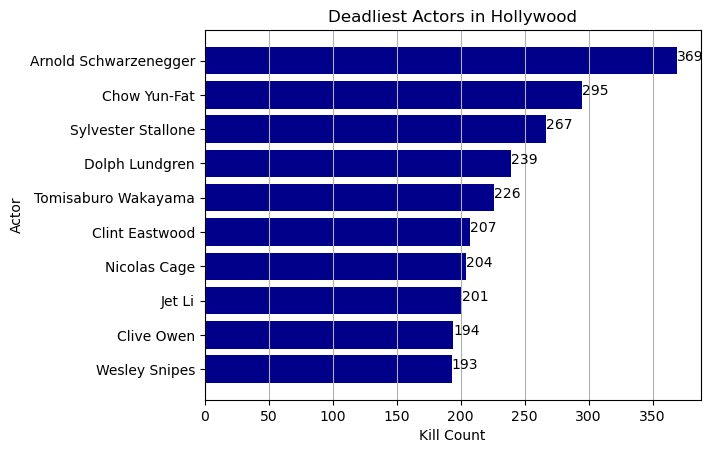

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# Specifying the file path for the dataset on deadliest actors
file_path = r"C:\Users\Meru\Downloads\actor_kill_counts.csv"

# Reading the dataset into a pandas DataFrame
data = pd.read_csv(file_path)

# Sorting the DataFrame by kill count in descending order
data = data.sort_values(by='Count', ascending=True)

# Creating a horizontal bar chart
plt.barh(data['Actor'], data['Count'], color='darkblue')

# Labeling axes and title
plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')

# Displaying the count value on each bar
for index, value in enumerate(data['Count']):
    plt.text(value, index, str(value))

# Displaying a grid on the x-axis
plt.grid(axis='x')

# Displaying the plot
plt.show()

<h3> Question 9 </h3>

Create a pie chart showing the fraction of all Roman Emperors that were assassinated. Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

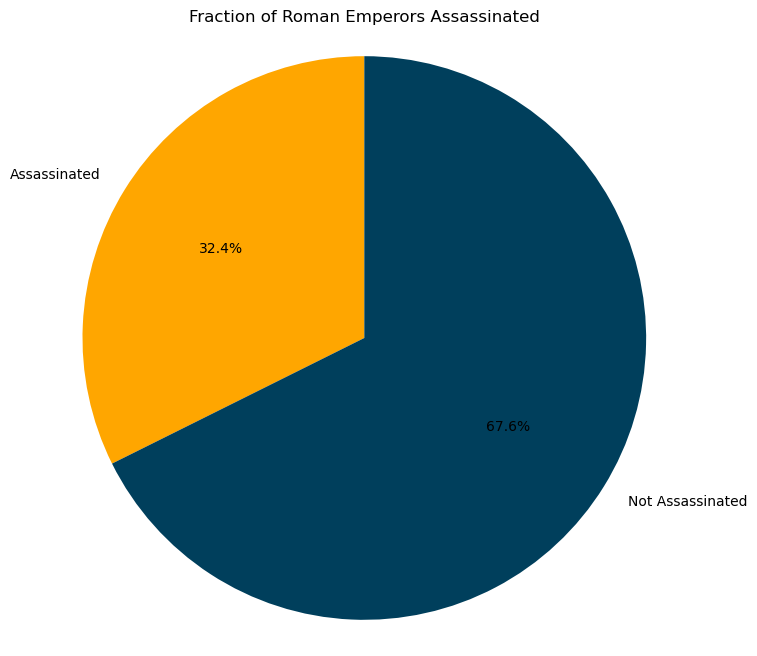

In [88]:
# Specifying the file path for the dataset on Roman emperor reigns
file_path = r"C:\Users\Meru\Downloads\roman-emperor-reigns.csv"

# Reading the dataset into a pandas DataFrame
data = pd.read_csv(file_path)

# Filtering emperors who were assassinated
assassinated_emperors = data[data['Cause_of_Death'] == 'Assassinated']

# Calculating the total number of emperors
total_emperors = len(data)

# Calculating the percentage of emperors who were assassinated
percentage_assassinated = (len(assassinated_emperors) / total_emperors) * 100

# Creating a figure with a specified size
plt.figure(figsize=(8, 8))

# Defining colors for the pie chart
colors = ['#ffa600', '#003f5c']

# Creating a pie chart with labels, percentages, starting angle, and colors
plt.pie([percentage_assassinated, 100 - percentage_assassinated],
        labels=['Assassinated', 'Not Assassinated'],
        autopct='%1.1f%%',
        startangle=90,
        colors=colors)

# Adding a title to the pie chart
plt.title('Fraction of Roman Emperors Assassinated')

# Ensuring the pie chart is circular
plt.axis('equal') 

# Displaying the pie chart
plt.show()

<h3> Question 10 </h3>

Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.

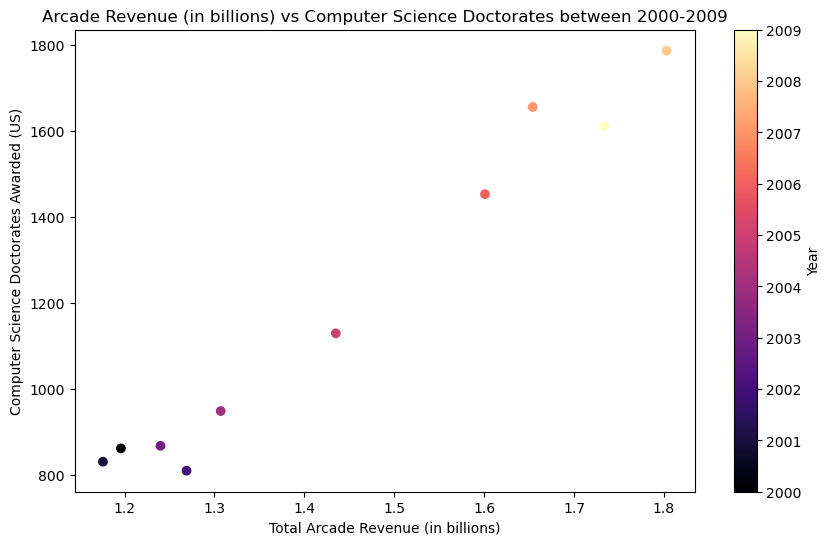

In [89]:
# Specifying the file path for the dataset on arcade revenue vs computer science doctorates
file_path = r"C:\Users\Meru\Downloads\arcade-revenue-vs-cs-doctorates.csv"

# Reading the dataset into a pandas DataFrame
data = pd.read_csv(file_path)

# Creating a figure with a specified size
plt.figure(figsize=(10, 6))

# Creating a scatter plot with color-coded points based on the year
scatter = plt.scatter(data['Total Arcade Revenue (billions)'], data['Computer Science Doctorates Awarded (US)'], c=data['Year'], cmap='magma')

# Adding labels to the x and y axes
plt.xlabel('Total Arcade Revenue (in billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')

# Adding a title to the plot
plt.title('Arcade Revenue (in billions) vs Computer Science Doctorates between 2000-2009')

# Creating a colorbar to represent the year
cbar = plt.colorbar(scatter)
cbar.set_label('Year')

# Displaying the scatter plot
plt.show()